Придумайте матрицы, которые обладают следующими свойствами:
a) диагональная, ортогональная, но не единичная(!):
b) верхнетреугольная, ортогональная:
c) нижнетреугольная, ортогональная:
d) матрица, у которой определитель = 1, и все элементы не равны 0:

In [4]:
A = [[1,0],
     [0,-1]]
print('a) диагональная, ортогональная, но не единичная(!):\n',A)
A = [[1,1,1],
     [0,-1,1],
     [0,0,1]]
print('b) верхнетреугольная, ортогональная:\n',A)
A = [[1,0,0],
     [1,-1,0],
     [1,1,1]]
print('c) нижнетреугольная, ортогональная:\n',A)
A = [[2,3],
     [3,5]]
print('d) матрица, у которой определитель = 1, и все элементы не равны 0:\n',A)

a) диагональная, ортогональная, но не единичная(!):
 [[1, 0], [0, -1]]
b) верхнетреугольная, ортогональная:
 [[1, 1, 1], [0, -1, 1], [0, 0, 1]]
c) нижнетреугольная, ортогональная:
 [[1, 0, 0], [1, -1, 0], [1, 1, 1]]
d) матрица, у которой определитель = 1, и все элементы не равны 0:
 [[2, 3], [3, 5]]


Найдите собственные значения и собственные вектора матриц:
m = np.array([[2, 2],
[1, 3]])
print(m)

In [9]:
import numpy as np

In [10]:
M = [[1,2],
     [2,3]]
M = np.array(M)
print(M)

[[1 2]
 [2 3]]


In [13]:
k,V = np.linalg.eig(M)
print(f'Собственные значения: {k},\nСобственные вектора:\n{V}')

Собственные значения: [-0.23606798  4.23606798],
Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]



Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA


In [88]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from mpl_toolkits.mplot3d import Axes3D

In [35]:
mnist = load_digits().data

In [36]:
mnist[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

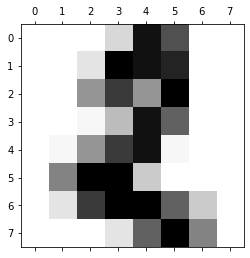

In [90]:
plt.matshow(mnist[2].reshape(8,8), cmap ='Greys')

In [53]:
mnist.shape


(1797, 64)

In [72]:
res = pd.DataFrame()
for i in range(int(mnist.shape[1]**0.5)):
    for j in range(mnist.shape[0]):
        m = mnist[j].reshape(8,8)
        pca = PCA(n_components=i)
        mt = pca.fit(m).transform(m)
        mv = pca.inverse_transform(mt)
        err = mse(m, mv)
        res = res.append({'error':err, 'RCA_count':i, 'digit':int(j%10)}, ignore_index=True)

In [73]:
res.digit = res.digit.astype(int)

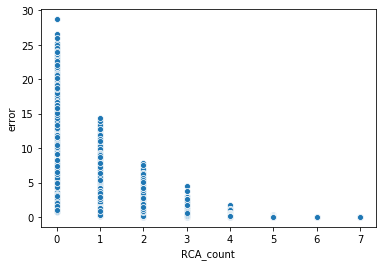

In [74]:
sns.scatterplot(res.RCA_count, res.error)

In [75]:
res

,RCA_count,digit,error
0,0.0,0,1.436719e+01
1,0.0,1,5.037109e+00
2,0.0,2,1.603125e+01
3,0.0,3,1.518945e+01
4,0.0,4,1.992578e+01
...,...,...,...
14371,7.0,2,5.732145e-30
14372,7.0,3,4.059090e-30
14373,7.0,4,8.502798e-30
14374,7.0,5,3.135414e-30


In [86]:
# средняя ошибка для различных значениях количества компонент PCA
res.groupby('RCA_count').error.agg('mean')


RCA_count
0.0    1.575842e+01
1.0    6.543179e+00
2.0    2.471298e+00
3.0    7.630356e-01
4.0    1.664597e-01
5.0    2.053486e-02
6.0    1.515602e-04
7.0    9.469143e-30
Name: error, dtype: float64

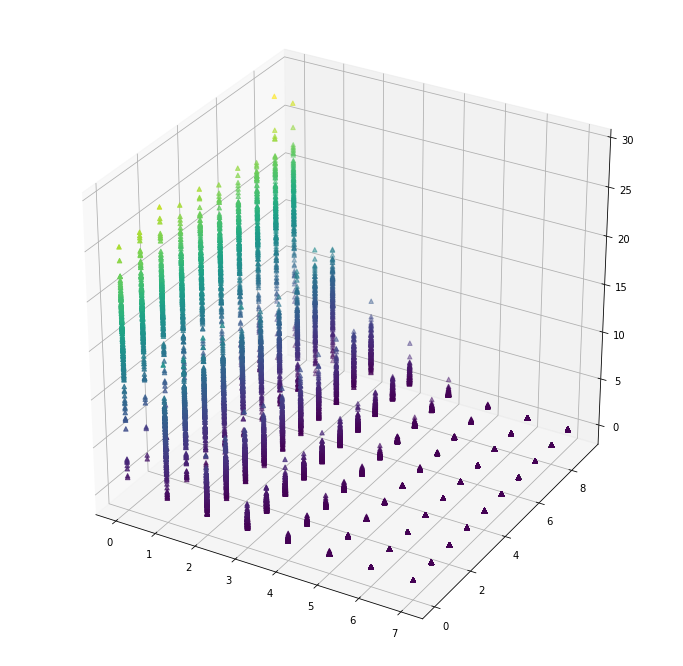

In [87]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
x = res.RCA_count
y = res.digit
z = res.error
ax.scatter(x, y, z, c=z, marker='^')
plt.show()